In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt  
from ipywidgets import widgets

%matplotlib inline

In [3]:
har_ds = pd.read_table('dataset-har-pair-fb.csv',sep=';')

C:\Users\jennhaur\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


user                  object
gender                object
age                    int64
how_tall_in_meters    object
weight                 int64
body_mass_index       object
x1                     int64
y1                     int64
z1                     int64
x2                     int64
y2                     int64
z2                     int64
x3                     int64
y3                     int64
z3                     int64
x4                     int64
y4                     int64
z4                    object
class                 object
dtype: object

In [4]:
#f = lambda x : x[0]+x[1]
#har_ds['height'] = har_ds['how_tall_in_meters'].str.split(",").apply(f).astype(int)
har_ds['height'] = har_ds['how_tall_in_meters'].str.split(",").apply(lambda x : x[0]+x[1]).astype(int)
del har_ds['how_tall_in_meters']

In [5]:
#f = lambda x : int(x[0])+int(x[1])/10
#har_ds['body_mass_index'].str.split(",").apply(lambda x : int(x[0])+int(x[1])/10)
har_ds['bmi'] = har_ds['body_mass_index'].str.split(",").apply(lambda x : int(x[0])+int(x[1])/10)
del har_ds['body_mass_index']

In [6]:
#pd.unique(har_ds['z4'])
#har_ds['z4'].to_numeric()
#har_ds['z4'].astype(int)

har_ds['z4'] = har_ds['z4'].convert_objects(convert_numeric=True)
har_ds.dtypes


C:\Users\jennhaur\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


user       object
gender     object
age         int64
weight      int64
x1          int64
y1          int64
z1          int64
x2          int64
y2          int64
z2          int64
x3          int64
y3          int64
z3          int64
x4          int64
y4          int64
z4        float64
class      object
height      int32
bmi       float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x192C2DF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120796F0>]], dtype=object)

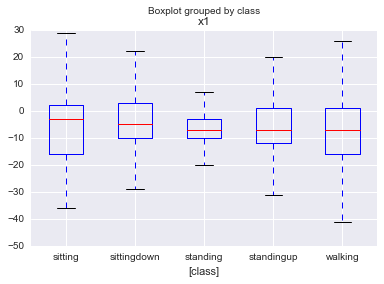

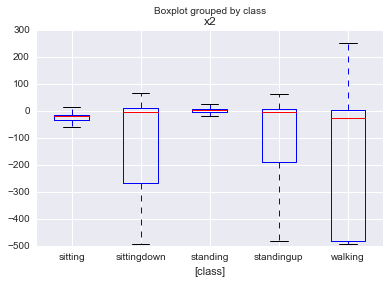

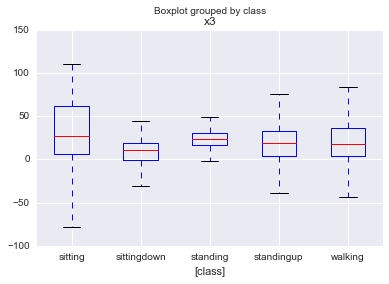

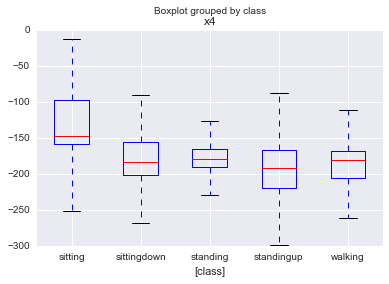

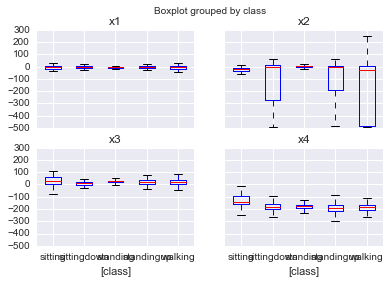

In [85]:
#x1 = waist, x2 = thigh, x3 = ankle, x4 = arm

#Option 1
#fig, ax = plt.subplots(5,1,sharex=True)
#har_ds[['class','x1']].groupby('class').boxplot(subplots=True,layout=(1,5),figsize=(15,3),sym="")

#Option 2
#show outliers
#har_ds[['class','x1']].boxplot(by='class',sym="k.")
#ignore outliers
har_ds[['class','x1']].boxplot(by='class',sym="")
har_ds[['class','x2']].boxplot(by='class',sym="")
har_ds[['class','x3']].boxplot(by='class',sym="")
har_ds[['class','x4']].boxplot(by='class',sym="")
har_ds[['class','x1','x2','x3','x4']].boxplot(by='class',sym="")

#Option 3
#df = har_ds[['class','x1']]
#df2 = df.pivot(columns=df.columns[0])
#df2.boxplot()
        

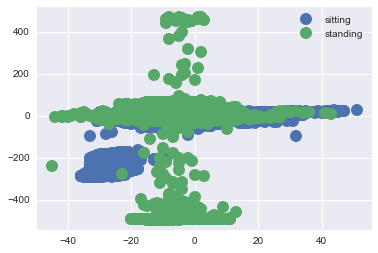

In [55]:
groups = har_ds[(har_ds['class'] == "sitting") | (har_ds['class'] == "standing")].groupby('class')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x1, group.x2, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.show()

#har_ds.plot.scatter(x='x1',y='x2')
#har_ds[['class','x1','x2']].groupby('class').plot.scatter(subplots=True,layout=(1,5),figsize=(15,3),sym="")



In [49]:
#Data Cleansing NaN
# %timeit har_ds.isnull().any()
#har_ds.isnull().sum()

har_ds.isnull().any()
har_ds.loc[har_ds['z4'].isnull().nonzero()]

har_ds_new = har_ds.drop(har_ds.index[122076])
#har_ds_new.loc[har_ds_new['z4'].isnull().nonzero()]
har_ds_new.isnull().any()

,user,gender,age,weight,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class,height,bmi
122076,jose_carlos,Man,75,67,-8,101,-120,-13,91,-101,17,123,-108,-207,-82,NaN,standingup,167,24


In [48]:
#Pandas Dummies to change Classes to One-Hot

user      False
gender    False
age       False
weight    False
x1        False
y1        False
z1        False
x2        False
y2        False
z2        False
x3        False
y3        False
z3        False
x4        False
y4        False
z4        False
class     False
height    False
bmi       False
dtype: bool

In [ ]:
# Split to training set and test set , cross validation
# Random Forest
# C4.5 Decision Tree / ID3 / Adaboost ? Adaboost with 10 iteration, C4.5 confidence factor 0.25
# 99.4% using 10-fold cross validation (sitting 100%, sitting down 96.9% , standing 99.8% , standing up 96.9% walking 99.8%)
# Confusion Matrix